<a href="https://colab.research.google.com/github/marllinkang/deep_running/blob/main/dl_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pwd

'/content'

In [ ]:
# /content/drive/MyDrive/test _ws/archive.zip

In [ ]:
!unzip -qq "/content/drive/MyDrive/test _ws/archive.zip"

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sys import path
path = '/content/Face Mask Dataset/'
dataset = {
    "image_path": [],
    "mask_status": [],
    "where":[]
}

for where in os.listdir(path):
    for status in os.listdir(path+"/"+where):
        for image in glob.glob(path+where+"/"+status+"/"+"*.png"):
            dataset["image_path"].append(image)
            dataset["mask_status"].append(status)
            dataset["where"].append(where)

dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation
1,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation
2,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation
3,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation
4,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation


In [ ]:
# 1.13 전체 데이터의 분포

with Mask: 5909
without Mask: 5883


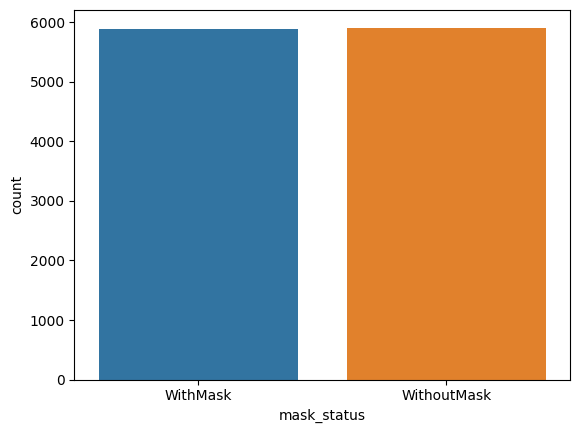

In [ ]:
print(f"with Mask:", dataset.value_counts("mask_status")[0])
print(f"without Mask:", dataset.value_counts("mask_status")[1])

sns.countplot(x = dataset["mask_status"]);

In [ ]:
#1.14 랜덤하게 추려서 어떤 데이터인지 확인하기

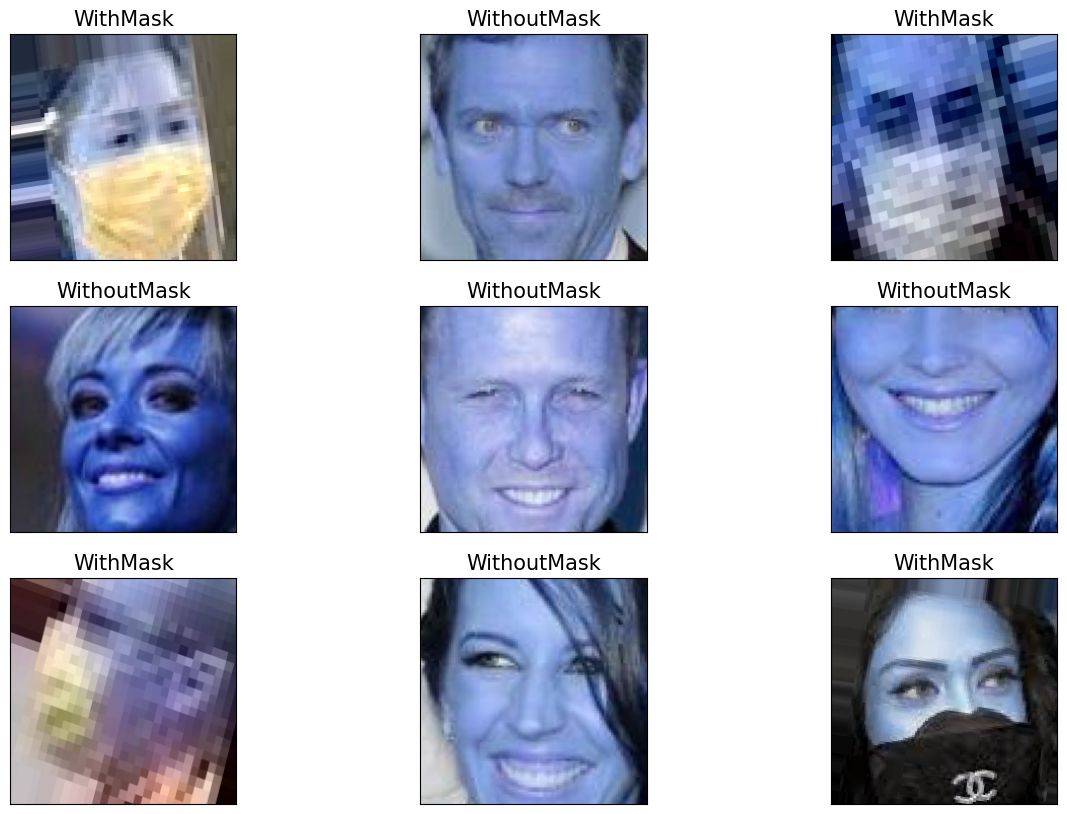

In [ ]:
import cv2

plt.figure(figsize = (15,10))

for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.imread(dataset.loc[random, "image_path"]))
    plt.title(dataset.loc[random, "mask_status"],size = 15)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
#1.16 train, test, validation으로 각각 저장

In [ ]:
train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
vaild_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))

                                            image_path mask_status  where
800  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
801  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
802  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
803  /content/Face Mask Dataset/Train/WithMask/823.png    WithMask  Train
804  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
805  /content/Face Mask Dataset/Train/WithMask/759.png    WithMask  Train
806  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
807  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
808  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
809  /content/Face Mask Dataset/Train/WithMask/229.png    WithMask  Train


In [ ]:
#1.17 train, test, validation 별 분포

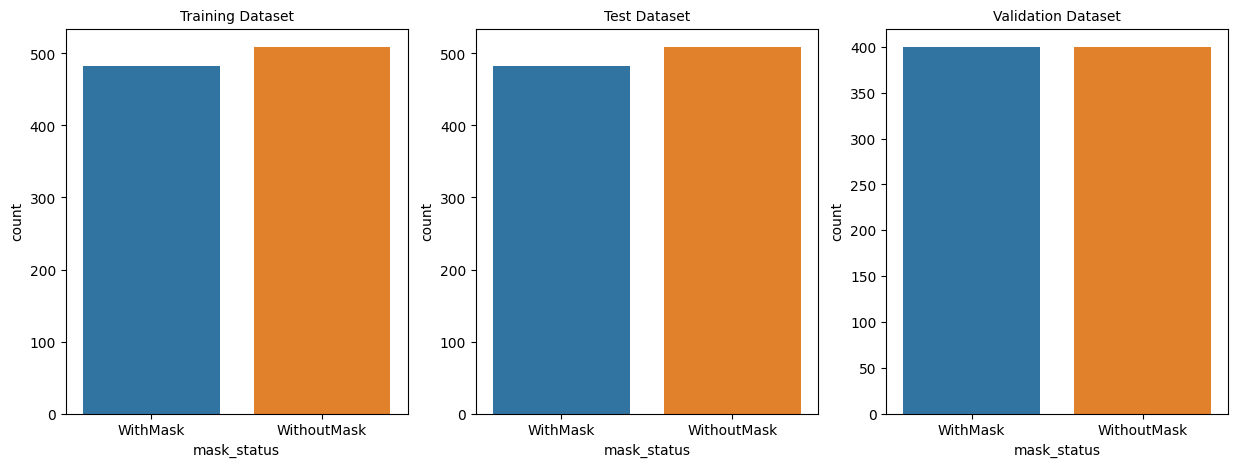

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1, 3, 1)
sns.countplot(x = test_df["mask_status"])
plt.title("Training Dataset", size = 10)

plt.subplot(1, 3, 2)
sns.countplot(x = test_df["mask_status"])
plt.title("Test Dataset", size =10)

plt.subplot(1, 3, 3)
sns.countplot(x = vaild_df["mask_status"])
plt.title("Validation Dataset", size = 10)

plt.show()

In [ ]:
# 1.18 결과

In [ ]:
#1.19 인덱스 좀 정리하고

In [ ]:
train_df = train_df.reset_index().drop("index", axis = 1)
train_df.head()

,image_path,mask_status,where
0,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
1,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
2,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
3,/content/Face Mask Dataset/Train/WithMask/823.png,WithMask,Train
4,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train


In [ ]:
# 1.20 gray 후 image resize 적용한 데이터를 data에 저장

In [ ]:
data = []
image_size = 150

for i in range(len(train_df)):
    ## Converting the image into grayscale
    img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)

    ## Resize the array
    new_image_array = cv2.resize(img_array,(image_size, image_size))

    ##Encoding the image with the label
    if train_df["mask_status"][i] == "withMask":
        data.append([new_image_array, 1])
    else:
        data.append([new_image_array, 0])


In [ ]:
# 1.21 data를 numpy로 변경

In [ ]:
type(data)

list

In [ ]:
data = np.array(data)
type(data)

<ipython-input-46-2657eb8d4193>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


numpy.ndarray

In [ ]:
np.random.shuffle(data)

In [ ]:
np.random.shuffle(data)

In [ ]:
#1.23 현재까지 데이터 확인

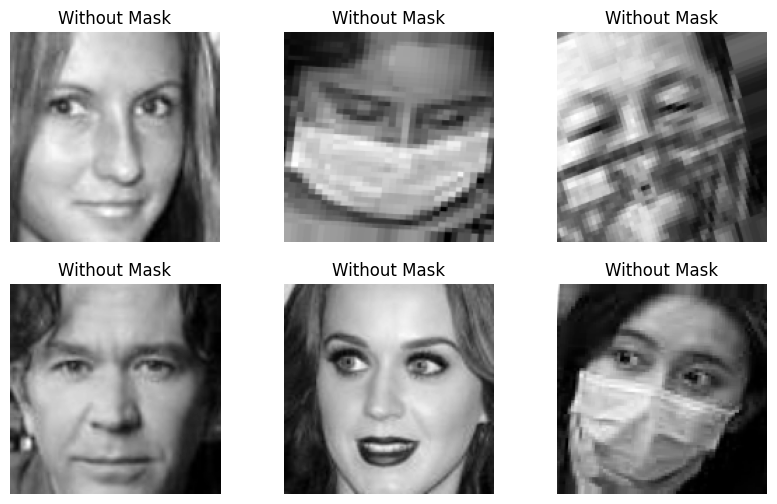

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (10, 6))

for row in range(2):
    for col in range(3):
        image_index = row*100+col

        ax[row,col].axis("off")
        ax[row,col].imshow(data[image_index][0], cmap = 'gray')

        if data[image_index][1] == 0:
            ax[row, col].set_title("Without Mask")
        else:
            ax[row,col].set_title("With Mask")

plt.show()

In [ ]:
#1.25 data의 구조

In [ ]:
data[0]

array([array([[ 97,  99, 103, ..., 212, 202, 196],
              [ 98, 100, 104, ..., 208, 199, 193],
              [100, 102, 105, ..., 203, 194, 188],
              ...,
              [ 53,  50,  46, ..., 105, 112, 117],
              [ 54,  51,  46, ..., 108, 113, 117],
              [ 55,  52,  47, ..., 110, 114, 117]], dtype=uint8), 0],
      dtype=object)

In [ ]:
x = []
y = []

for image in data:
    x.append(image[0])
    y.append(image[1])

x = np.array(x)
y = np.array(y)

In [ ]:
#1.27 test, train으로 분리

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size= 0.2,random_state = 13)

In [ ]:
#1.28 모델 구성

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([

    layers.Conv2D(32, kernel_size =(5,5),strides =(1,1), activation = 'relu', padding ='same', input_shape = (150, 150, 1)),
    layers.MaxPooling2D(pool_size=(2,2), strides =(2,2)),
    layers.Conv2D(64, (2,2), activation = 'relu', padding ='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation ='relu'),
    layers.Dense(10, activation ='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 37, 37, 64)        0         
                                                                 
 flatten (Flatten)           (None, 87616)             0

In [ ]:
#1.29 파라미터 설정

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.BinaryCrossentropy(),metrics =['accuracy'])

In [ ]:
#1.30 학습

In [ ]:
x_train = x_train.reshape(len(x_train),x_train.shape[1], x_train.shape[2],1)
x_val